In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")

### Universe of each Quantity

In [9]:
# GIVEN AS PER QUESTION
min_D = 0; max_D = 10; step_D = 0.5;
min_A = 0; max_A = 90; step_A = 1;
min_S = 0; max_S = 5; step_S = 0.2;
min_ST = 0; max_ST = 90; step_ST = 1;

### The following fuzzy quantities are defined, with their corresponding states:
##### D - Distance from obstacle [N=Near, F=Far, VF=Very Far]
##### A - Angle with obstacle [S=Small, M=Medium, L=Large]
##### S - Speed [SS= Slow Speed, MS=Medium Speed, FS=Fast Speed, MS=Maximum Speed]
##### ST - Steering Turn [MST=Mild Turn, SST=Sharp Turn, VST=Very Sharp Turn]

### Membership functions of inputs and outputs

In [10]:
# Input - Antecedent
D = ctrl.Antecedent(np.arange(min_D, max_D + step_D, step_D),'Distance')
D["N"] = fuzz.trimf(D.universe,[0,0,5])
D["F"] = fuzz.trimf(D.universe, [2.5,5,7.5])
D["VF"] = fuzz.trimf(D.universe, [5,10,10])

A = ctrl.Antecedent(np.arange(min_A, max_A + step_A, step_A),'Angle')
A["S"] = fuzz.trimf(A.universe,[0, 0, 20])
A["M"] = fuzz.trimf(A.universe, [15, 40, 60])
A["L"] = fuzz.trimf(A.universe, [55, 90, 90])

# Output - Consequent
S = ctrl.Consequent(np.arange(min_S, max_S + step_S, step_S),'Speed',defuzzify_method="centroid")
S["SS"] = fuzz.trimf(S.universe, [0, 0, 1.6])
S["MS"] = fuzz.trimf(S.universe, [1.2,2,2.8])
S["FS"] = fuzz.trimf(S.universe, [2.4, 3.2, 4])
S["MX"] = fuzz.trimf(S.universe, [3.6, 5, 5])

ST = ctrl.Consequent(np.arange(min_ST, max_ST + step_ST, step_ST),'Steering Turn',defuzzify_method="centroid")
ST["MST"] = fuzz.trimf(A.universe,[0, 0, 35])
ST["SST"] = fuzz.trimf(A.universe, [25, 45, 60])
ST["VST"] = fuzz.trimf(A.universe, [55, 90, 90])


### Rules used for Inferencing

In [11]:
rule1 = ctrl.Rule(D['N'] & A['S'],(S['SS'],ST['VST']))
rule2 = ctrl.Rule(D['N'] & A['M'],(S['SS'],ST['SST']))
rule3 = ctrl.Rule(D['N'] & A['L'],(S['SS'],ST['SST']))
rule4 = ctrl.Rule(D['F'] & A['S'],(S['MS'],ST['SST']))
rule5 = ctrl.Rule(D['F'] & A['M'],(S['MS'],ST['SST']))
rule6 = ctrl.Rule(D['F'] & A['L'],(S['FS'],ST['MST']))
rule7 = ctrl.Rule(D['VF'] & A['S'],(S['FS'],ST['MST']))
rule8 = ctrl.Rule(D['VF'] & A['M'],(S['MX'],ST['MST']))
rule9 = ctrl.Rule(D['VF'] & A['L'],(S['MX'],ST['MST']))

In [12]:
# Creating System
sys_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5 ,rule6, rule7, rule8, rule9])

In [13]:
simulation = ctrl.ControlSystemSimulation(sys_ctrl)

### PLOTTING Input/Output States before simulation

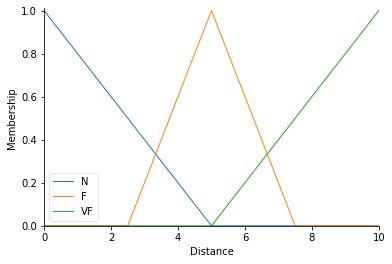

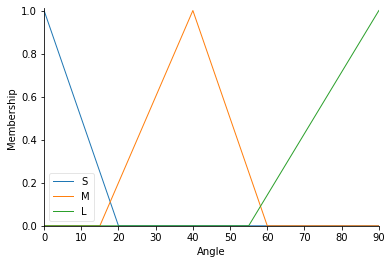

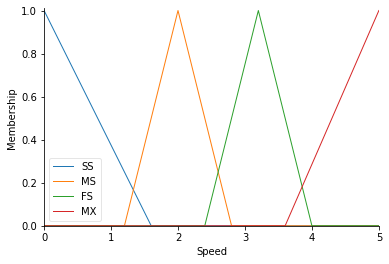

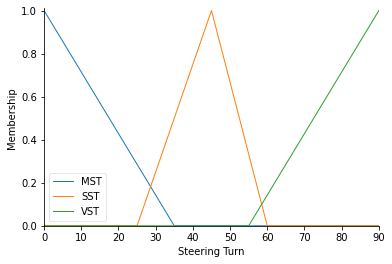

In [14]:
D.view()
A.view()
S.view()
ST.view()

### PLOTTING Output States after simulation

### Input 1

OrderedDict([('Speed', 2.344587495375509), ('Steering Turn', 39.220790378006846)])


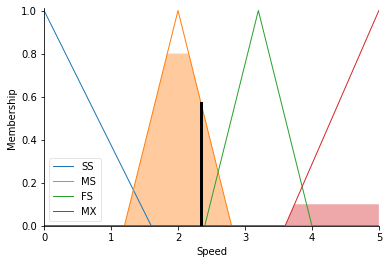

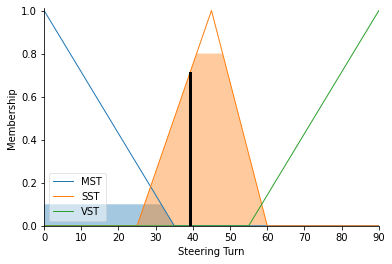

In [15]:
simulation.input['Distance'] = 5.5
simulation.input['Angle'] = 35

simulation.compute()

print(simulation.output)

S.view(sim=simulation)
ST.view(sim=simulation)

Defuzzification used is **Centroid** and the crisp value obtained is 0.55 for speed and 0.7 for steering turn

### Input 2

OrderedDict([('Speed', 2.645656565656565), ('Steering Turn', 35.18573797678273)])


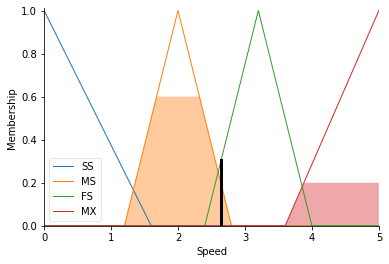

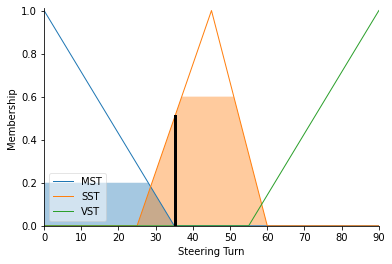

In [16]:
simulation.input['Distance'] = 6
simulation.input['Angle'] = 45

simulation.compute()

print(simulation.output)

S.view(sim=simulation)
ST.view(sim=simulation)

Defuzzification used is **Centroid** and the crisp value obtained is 0.3 for speed and 0.5 for steering turn